In [79]:
import cv2 
import numpy as np

In [80]:
img = cv2.imread('bookpage.jpg')

In [82]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [83]:
# ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

In [84]:
th = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.bitwise_not(th, th)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [85]:
# denoise 
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,  3))
# dilated = cv2.dilate(th, kernel, iterations=9)  

In [86]:
_,contours1 , hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
len(contours1)

24

In [87]:
_,contours2 , hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
len(contours2)

26

In [88]:
for contour in contours1:
    
    [x, y, w, h] = cv2.boundingRect(contour)
#     print(x, y, w, h)
#     if h > 300 and w > 300:
#         continue
    
#     if h < 40 and w < 35:
#         continue
        
    cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)
    
for contour in contours2:
#     print(x, y, w, h)
    [x, y, w, h] = cv2.boundingRect(contour)
    
#     if h > 300 and w > 300:
#         continue
    
#     if h < 40 and w < 35:
#         continue
        
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,255), 2)

In [89]:
# cv2.imshow('captcha_result', img)
# cv2.imshow('captcha_relt', th)

# cv2.waitKey()
# cv2.destroyAllWindows()

In [90]:
# cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [91]:
# contours1[0]

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

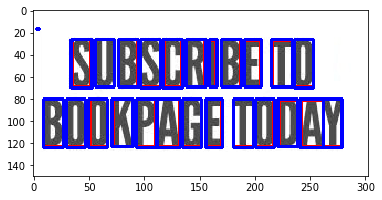

In [93]:
plt.imshow(img)

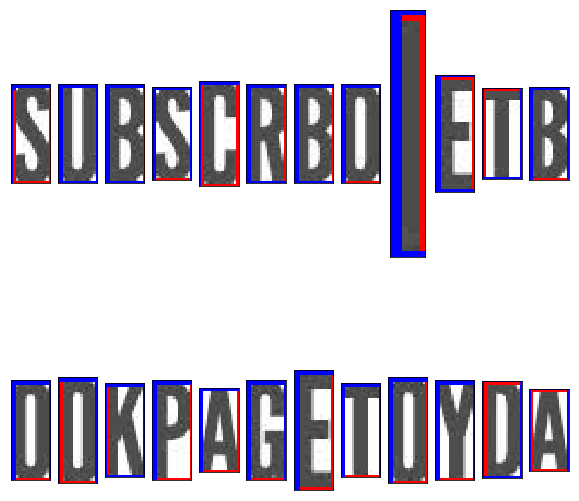

In [96]:
fig, axes = plt.subplots(2, 12, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    c = contours1[23-i]
    [x, y, w, h] = cv2.boundingRect(c)
    ax.imshow(img[y:y+h, x:x+w, :])
    ax.set_xticks([])
    ax.set_yticks([])

242 81 20 42


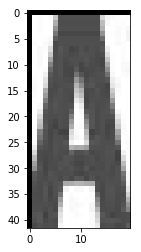

In [69]:
# c = contours1[0]
# [x, y, w, h] = cv2.boundingRect(c)
# print(x, y, w, h)
# plt.imshow(img[y:y+h, x:x+w, :])

In [62]:
cv2.imshow('im',img[x:x+w, y:y+h, :])
cv2.imshow('captcha_relt', th)
cv2.waitKey(0)
cv2.destroyAllWindows()